In [6]:
import numpy as np
import matplotlib.pyplot as plt

I define the arrays for the data


In [8]:
n=np.array([1,2,3,4,5,6,7,8,9])
angle_degree=np.array([12,22,25,38,46,72,77,86,135])
angle_degree_u=np.array([2,4,5,6,7,10,12,16,18])

I transform the angle into radian, because numpy likes radian

In [9]:
angle=np.deg2rad(angle_degree)
angle_u=np.deg2rad(angle_degree_u)

Now I want to plot $sin(\theta/2)$ against n

Text(0, 0.5, '$sin(\\theta/2)$')

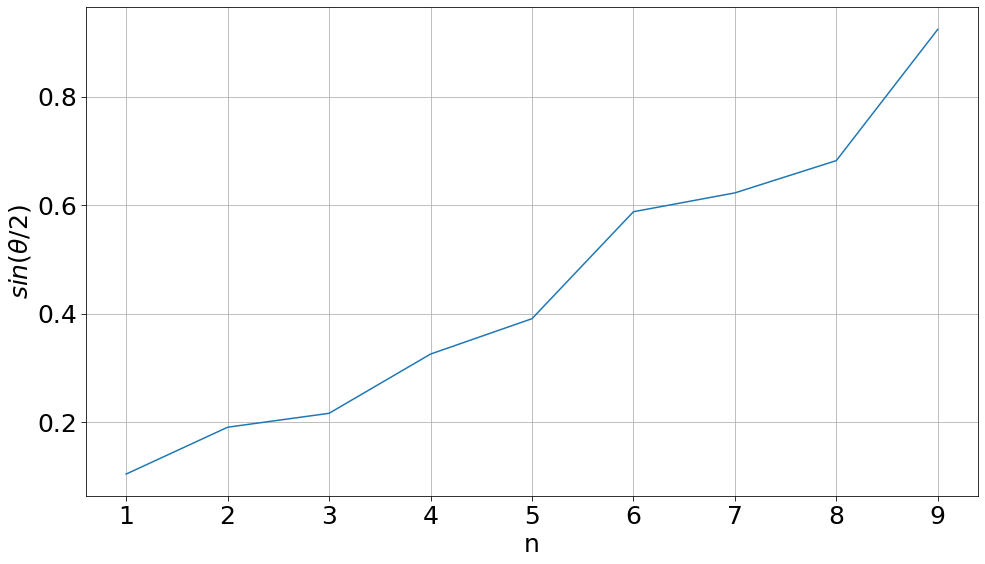

In [18]:
fig, ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(16)

ax.grid(True,which="major")
ax.grid(True,which="minor",ls="--",lw=0.5)
ax.tick_params(axis='both', which='both', labelsize=25,length=5)

plt.plot(n,np.sin(angle/2))
plt.xlabel("n",fontsize=25)
plt.ylabel(r"$sin(\theta/2)$",fontsize=25)

Now I want to add error bars. For this I need to transform the uncertainty.

In general gaussian error propagation tells us: $$u=\sqrt{\Big(\frac{df}{dx_1}\Big)^2\cdot u_{x_1}^2+\Big(\frac{df}{dx_2}\Big)^2\cdot u_{x_2}^2+...}$$

Here we have $f(\theta)=sin(\theta/2)$
This means $\frac{df}{d\theta}=1/2\cdot cos(\theta/2)$

This means the uncertainty becomes

In [21]:
u_sin=0.5*np.cos(angle/2)*angle_u

<ErrorbarContainer object of 3 artists>

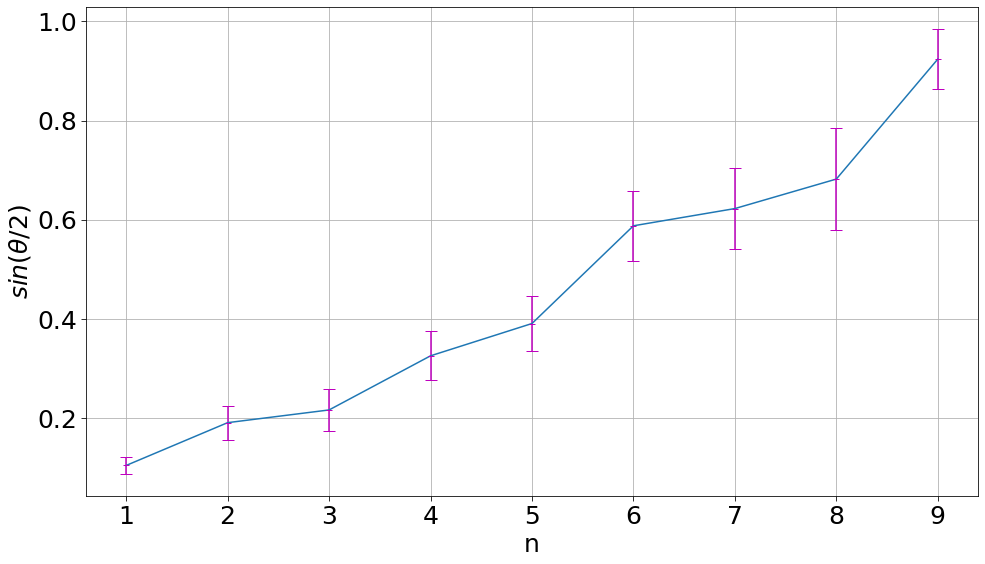

In [22]:
fig, ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(16)

ax.grid(True,which="major")
ax.grid(True,which="minor",ls="--",lw=0.5)
ax.tick_params(axis='both', which='both', labelsize=25,length=5)

plt.plot(n,np.sin(angle/2))
plt.xlabel("n",fontsize=25)
plt.ylabel(r"$sin(\theta/2)$",fontsize=25)

plt.errorbar(n,np.sin(angle/2), yerr=u_sin,solid_capstyle='projecting', capsize=6, ecolor="m",fmt="m_", label="Number of sources per flux bin")

Now we assume the wavelength to be 0.0711nm

You could perform a regression, but since we have not covered this topic in class I will calculate d for each data point and take the mean

We can calculate d by $d=\frac{\lambda\cdot n}{2\cdot sin(\theta/2)}$

Now we have $\frac{dd}{d\theta}=\frac{\lambda\cdot n}{2}\cdot-\dfrac{\cos\left(\frac{x}{2}\right)}{2\sin^2\left(\frac{x}{2}\right)}$

In [29]:
lamda=0.0711

d=lamda*n/(2*np.sin(angle/2))
d

array([0.34009875, 0.37262394, 0.49274714, 0.43677491, 0.4549164 ,
       0.36288763, 0.39974964, 0.4170098 , 0.34631138])

I calculate the uncertainty

In [34]:
d_u=lamda*n/2*np.cos(angle/2)/(2*(np.sin(angle/2))**2)*angle_u
d_u

array([0.05647577, 0.06691536, 0.09698091, 0.06641779, 0.0654674 ,
       0.04358715, 0.05262735, 0.06243926, 0.02253258])

Now I can calculate a weighted mean

In [35]:
w=1/d_u**2

The d value is:

In [36]:
d_mean=np.sum(d*w)/np.sum(w)
d_mean

0.3727533969883879

The uncertainty is:

In [40]:
d_mean_u=np.sqrt(1/np.sum(w))
d_mean_u

0.015399738135253433

Estimators:
numpy already has functions for drawing random variables from a gaussian distribution and a uniform distribution

In [49]:
np.random.normal(170,10,10)

array([181.48208453, 157.15167561, 177.93636704, 154.8330248 ,
       179.76373778, 182.36661967, 169.57697049, 168.5237124 ,
       172.76958424, 176.88766288])

In [54]:
np.random.uniform(160,180,10)

array([164.58891878, 168.48196837, 177.54962789, 173.24427899,
       163.15723467, 165.47868427, 166.88461698, 167.21749048,
       162.37760939, 167.07307195])

numpy already has methods for mean and median, so I will use them. Now I write a function to calculate the geometric mean.

In [80]:
def geometric_mean(x):
    N=len(x)
    geo_mean=(np.prod(x))**(1/N)
    return geo_mean

Since it is almost impossible to have the same value in 10 random draws, the mode will acutally always be just a random value from the ten variables. Therefore I just take one value from the 10 draws as the mode each time

In [81]:
def mode(x):
    return x[0]

I define a function to repeat the experiment 10000 times. I use an input parameter A to decide if the function should use a gaussian distribution or a normal distribution.

In [102]:
def Iteration(A):
    
    if A==0:
        mean_array=np.zeros(0)
        median_array=np.zeros(0)
        geometric_mean_array=np.zeros(0)
        mode_array=np.zeros(0)

        for i in range(10000):
            Gaussian_draw=np.random.normal(170,10,10)
            #uniform_draw=np.random.uniform(160,180,10)
    
            mean_calc=np.mean(Gaussian_draw)
            median_calc=np.median(Gaussian_draw)
            geometric_calc=geometric_mean(Gaussian_draw)
            mode_calc=mode(Gaussian_draw)
    
            mean_array=np.append([mean_calc],[mean_array])
            median_array=np.append([median_calc],[median_array])
            geometric_mean_array=np.append([geometric_mean_array],[geometric_calc])
            mode_array=np.append([mode_array],[mode_calc])
            
            
    if A==1:
            mean_array=np.zeros(0)
            median_array=np.zeros(0)
            geometric_mean_array=np.zeros(0)
            mode_array=np.zeros(0)

            for i in range(10000):
                #Gaussian_draw=np.random.normal(170,10,10)
                uniform_draw=np.random.uniform(160,180,10)
    
                mean_calc=np.mean(uniform_draw)
                median_calc=np.median(uniform_draw)
                geometric_calc=geometric_mean(uniform_draw)
                mode_calc=mode(uniform_draw)
    
                mean_array=np.append([mean_calc],[mean_array])
                median_array=np.append([median_calc],[median_array])
                geometric_mean_array=np.append([geometric_mean_array],[geometric_calc])
                mode_array=np.append([mode_array],[mode_calc])
        
    return mean_array,median_array,geometric_mean_array,mode_array


First up the gaussian draw

In [103]:
a=Iteration(0)

In [104]:
mean_a=a[0]
median_a=a[1]
mean_geo_a=a[2]
mode_a=a[3]

Now the uniform draw

In [105]:
b=Iteration(1)

In [106]:
mean_b=b[0]
median_b=b[1]
mean_geo_b=b[2]
mode_b=b[3]

Now we can calculate the variance for the gaussian

In [110]:
np.std(mean_a)**2

9.907221903450687

In [111]:
np.std(median_a)**2

13.909958467737992

In [112]:
np.std(mean_geo_a)**2

9.974151426518324

In [113]:
np.std(mode_a)**2

98.67064126750314

And the variance for the uniform distribution

In [114]:
np.std(mean_b)**2

3.373446992321434

In [115]:
np.std(median_b)**2

7.704287995392341

In [116]:
np.std(mean_geo_b)**2

3.37423155615575

In [117]:
np.std(mode_b)**2

33.63405440098355